# Overfitting

Let's look at doing some quick machine learning with scikit learn

## Grab Some Data

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_boston', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_friedman2', 'make

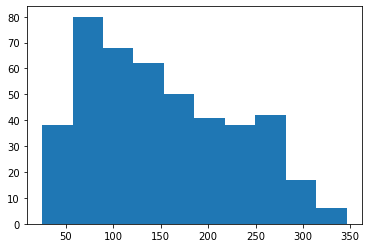

In [11]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline


print(dir(datasets))  # look at methods available
diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes.DESCR)

plt.hist(diabetes.target)


training_data = diabetes.data[:300]
training_target = diabetes.target[:300]
testing_data = diabetes.data[300:]
testing_target = diabetes.target[300:]

## MLP

In [2]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import math

mlp = MLPRegressor(alpha=1e-6,
                   hidden_layer_sizes=(10,), random_state=1, max_iter=10000)

mlp.fit(training_data, training_target)

def RMSE(data, target, regressor):
    prediction = regressor.predict(data)
    return math.sqrt(np.mean((prediction-target)**2))


print("E_t = {:.3f},  E_g = {:.3f}".format(RMSE(training_data, training_target, mlp),
                                          RMSE(testing_data, testing_target, mlp)))

E_t = 54.150,  E_g = 53.189


## Test Overfitting

2 4 6 8 10 12 14 16 18 

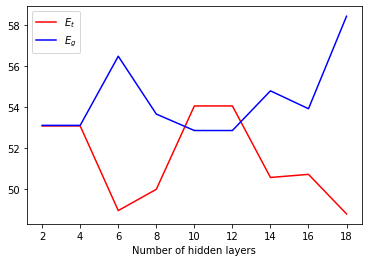

In [14]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import warnings

h = []
Et = []
Eg = []
for hidden in range(2,20,2):
    print(hidden, end=" ")
    mlp = MLPRegressor(solver='lbfgs', alpha=0.000001,
                       hidden_layer_sizes=(hidden,), random_state=1, max_iter=10000)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        mlp.fit(training_data, training_target)
    h.append(hidden)
    Et.append(RMSE(training_data, training_target, mlp))
    Eg.append(RMSE(testing_data, testing_target, mlp))
    

plt.plot(h, Et, "-r", label="$E_t$")
plt.plot(h, Eg, "-b", label="$E_g$")
plt.legend()
plt.xlabel("Number of hidden layers")
plt.show()